In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]
location_ids = [163,179,214]

In [3]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [4]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])

# HEMOGLOBIN

In [5]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [6]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [7]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.121170  0.120864   
                                     0.8             0.285659  0.285538   
                                2025 0.2            -0.043320 -0.043811   
                                     0.5             0.121170  0.120864   
                                     0.8             0.285659  0.285538   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.112044  0.127433   
                                     0.8             0.282052  0.288135   
                                2025 0.2            -0.057964 -0.033269   
                                     0.5             0.112044  0.127433   
                                     0.8             0.282052  0.288135   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.126008  0.127203   
                                     0.8             0.287572  0.288044   
                                2025 0.2            -0.035555 -0.033638   
                                     0.5             0.126008  0.127203   
                                     0.8             0.287572  0.288044   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
163         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.116804  0.123249   
                                     0.8             0.283934  0.286481   
                                2025 0.2            -0.050326 -0.039984   
                                     0.5             0.116804  0.123249   
                                     0.8             0.283934  0.286481   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [8]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        150.882325   
                   3            NaN     baseline        125.060792   
                   4            NaN     baseline        104.595012   
                   5            NaN     baseline        106.365275   
            2      2            NaN     baseline        151.427331   
...                                                            ...   
214         2      5            2024.0  0.5             100.806476   
                                        0.8             101.739763   
                                2025.0  0.2              99.873189   
                                        0.5             100.806476   
                                        0.8             101.739763   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.169470   
                   3            NaN     baseline        124.545652   
                   4            NaN     baseline        103.273438   
                   5            NaN     baseline        106.588611   
            2      2            NaN     baseline        151.008755   
...                                                            ...   
214         2      5            2024.0  0.5             102.112823   
                                        0.8             102.485489   
                                2025.0  0.2             101.740157   
                                        0.5             102.112823   
                                        0.8             102.485489   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        151.189820   
                   3            NaN     baseline        124.095083   
                   4            NaN     baseline        103.700754   
                   5            NaN     baseline        106.488775   
            2      2            NaN     baseline        153.620549   
...                                                            ...   
214         2      5            2024.0  0.5              98.742043   
                                        0.8              99.077260   
                                2025.0  0.2              98.406826   
                                        0.5              98.742043   
                                        0.8              99.077260   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.439651   
                   3            NaN     baseline        123.806288   
                   4            NaN     baseline        104.099033   
                   5            NaN     baseline        106.791557   
            2      2            NaN     baseline        152.565853   
...                                                            ...   
214         2      5            2024.0  0.5             100.605878   
                                        0.8             100.866761   
                                2025.0  0.2             100.344994   
                                        0.5             100.605878   
                                        0.8             100.866761   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
163         1      2            NaN     baseline        152.105024   
                   3            NaN     baseline        123.624327   
                   4            NaN     baseline        103.851905   
                   5            NaN     baseline        106.795405

In [9]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [10]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [11]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000228   
                                              0.8             0.000724   
                                     draw_999 0.2            -0.000117   
                                              0.5             0.000348   
                                              0.8             0.000935   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.005893   
                                              0.8             0.014665   
                                     draw_999 0.2            -0.002056   
                                              0.5             0.005325   
                                              0.8             0.012668   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000489   
                                              0.8             0.001196   
                                     draw_999 0.2            -0.000240   
                                              0.5             0.000611   
                                              0.8             0.001432   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
163         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.006610   
                                              0.8             0.016585   
                                     draw_999 0.2            -0.002413   
                                              0.5             0.006284   
                                              0.8             0.015034   

                                                                 mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level                 
163         2            1      2021 draw_0   0.2         

In [12]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [13]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [14]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -5.196366 -2.712220 -2.778930 -1.663475   
            0.5            2022 -3.042412 -1.532512 -1.545453 -0.958536   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -4.878653 -4.766599 -1.022329 -3.047406   
            0.5            2022 -2.719446 -2.666169 -0.566876 -1.818299   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
163         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022 -2.817963 -6.980323  ... -3.324578 -3.428494   
            0.5            2022 -1.572891 -3.902495  ... -1.868186 -1.892125   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -5.947532 -6.377361 -2.064588 -5.092594   
            0.5            2022 -3.356957 -3.622373 -1.181952 -2.782679   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
163         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022 -4.800439 -2.698417 -2.009170 -2.576079  
            0.5            2022 -2.702219 -1.523048 -1.158669 -1.436383  

[5 rows x 1000 columns]

In [41]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748
179,2090.305970,1866.508435,1561.032772,1940.712742,1502.543836,1863.066753,2097.522027,1447.410948,1989.487021,1285.813234,...,1494.920915,1939.814199,1828.484615,1619.419084,1656.751381,1794.860523,876.095132,1338.965653,1483.540253,1281.514699
214,2502.478041,2359.193777,1879.667437,2557.947179,1859.352901,2107.820694,2078.923863,1662.290406,2331.917803,1613.075255,...,2228.535445,2416.268330,2152.425437,1993.958740,2001.430361,2261.944406,1112.764495,1450.813055,1767.818974,1702.493995


In [44]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
163          3           192       0.841738
179          3           192       0.894505
214          3           192       0.737197
dtype: float64

In [47]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.274570 -0.152693 -0.197833 -0.094914   
            0.5            2022 -0.160757 -0.086277 -0.110021 -0.054692   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.335939 -0.278943 -0.055754 -0.221657   
            0.5            2022 -0.187258 -0.156025 -0.030915 -0.132256   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
163         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022 -0.144586 -0.603282  ... -0.239091 -0.205158   
            0.5            2022 -0.080703 -0.337277  ... -0.134353 -0.113223   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
163         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022 -0.358530 -0.430907 -0.136895 -0.310230   
            0.5            2022 -0.202365 -0.244757 -0.078370 -0.169515   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
163         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022 -0.596389 -0.204392 -0.157236 -0.204899  
            0.5            2022 -0.335714 -0.115363 -0.090676 -0.114249  

[5 rows x 1000 columns]

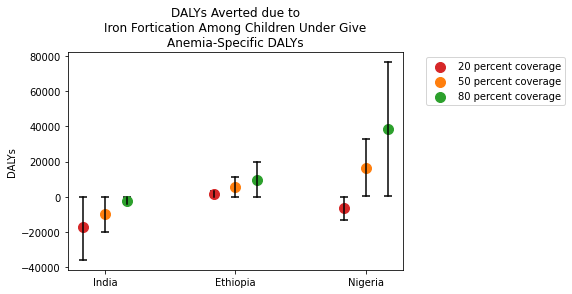

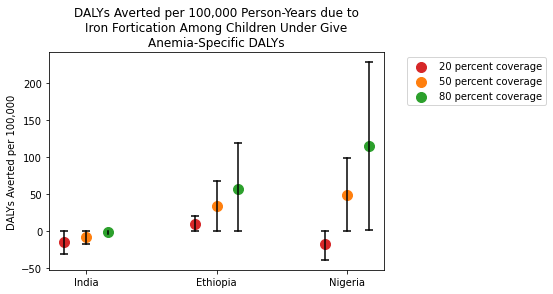

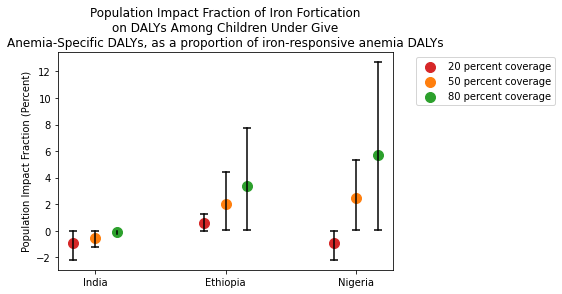

In [46]:
make_india_ethiopia_nigeria_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs')

make_india_ethiopia_nigeria_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs')

make_india_ethiopia_nigeria_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs')

# LBWSG to be added ....